# Visualisation en 2 dimensions de données multi-dimensionnelles

Utilisez `matplotlib` et plus particulièrement la fonction `matplotlib.pyplot.draw` pour affichez sur le plan une liste de segments. 

Chaque segment est défini par, respectivement, la liste des abscisses et la liste des ordonnées de ses deux deux extrémités.

In [3]:
!pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.draw?

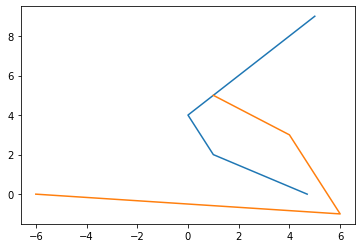

In [14]:
fig1=plt.plot([5,0,1,4.7],[9,4,2,0])
fig2=plt.plot([1,4,6,-6],[5,3,-1,0])
#
plt.draw()

Le dispositifs de visualisation les plus courants permettent une visualisation des données en deux dimensions. Lorsque les données sont initialement multi-dimensionnelles, il va s'agir de projeter ces données sur un sous-espace vectoriel de dimension deux.

## Rappels d'algèbre linéaire

Soient $F$ un espace vectoriel et $E$ un sous-espace vectoriel de $F$. Il est possible de décomposer un vecteur $x \in F$ comme la somme $x = x_E + x^\perp$ avec $x_E \in E$ et $x^\perp$ tel que $\forall y \in E, \langle x^\perp,y \rangle=0$.

$x_E$ est la projection orthogonale de $x$ dans le sous-espace vectoriel $E$.

Ecrire la fonction qui, recevant en paramètre une liste de vecteurs formant une base du sous-espace vectoriel $E$ et $x$ un vecteur de $F$, renvoie le vecteur $x_E$, le projeté de $x$ sur le sous-espace vectoriel $E$.

Remarque, le vecteur $x_E$ est composé de la somme des projections orthogonales de $x$ sur chacun des vecteurs de la base de $E$.

Vérifiez notamment, qu'en dimension 3 (axes $\vec{x}, $\vec{y} et $\vec{z}$), le projeté d'un vecteur sur le plan défini par la base $B_1 = \{(1,0,0), (0,1,0)\}$ a sa composante composante sur $\vec{z}$ nulle.

Faites les vérifications équivalentes sur les sous-espaces vectoriels définis par les bases suivantes :
- $B_2=\{(1,0,0), (0,0,1)\}$
- $B_3=\{(0,1,0), (0,0,1)\}$

In [15]:
B2 = ((1,0,0),(0,0,1))#
B3 = ((0,1,0),(0,0,1)) #
B1 = ((1,0,0),(0,1,0))
B=((1,0,0),(0,1,0),(0,0,1)) #base canonnique de R3
def foo(Base,x):
    xE=[]
    n=int(len(x))
    for i in range(n):
        xE.append(np.dot((np.dot(x[i],Base[i])/(np.dot(Base[i],Base[i]))),Base[i])) #produit scalaire : le projecté
    return xE

In [16]:
def point2D(a,b):
    x_coords, y_coords = zip(a, b)
    plt.scatter(x_coords, y_coords, color=["r","b"])
    plt.axis([-2, 9, -8, 10])
    plt.grid()
    plt.show()

In [17]:
def vecteur2D(vecteur,origine,txt,**options):
    
    x0=origine[0]
    y0=origine[0]
    x=vecteur[0]
    y=vecteur[1]
    
    plt.text(x-1, y-1, txt, fontsize=18, **options)
    
    return plt.arrow(x0, y0, x, y,head_width=0.2, head_length=0.3, length_includes_head=True, **options)

In [18]:
x=((2,3,1),(3,5,4))
res1 = foo(B1,x)
print("En fonction de la base B1 : \n",res1)

En fonction de la base B1 : 
 [array([2., 0., 0.]), array([0., 5., 0.])]


In [19]:
res2 = foo(B2,x)
print("En fonction d'une base B2 :\n",res2)

En fonction d'une base B2 :
 [array([2., 0., 0.]), array([0., 0., 4.])]


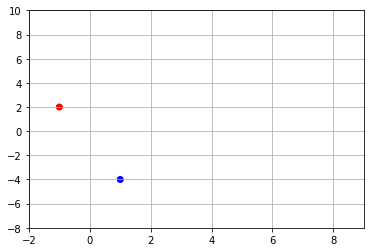

In [20]:
vect1=np.array((-1,2))
vect2=np.array((1,-4))
point2D(vect1,vect2)

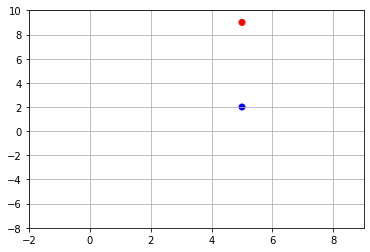

In [21]:
#définition d'un autre vecteur x et de sa projection xE
x=np.array([5,9])
xE=np.array([5,2])
point2D(x,xE)

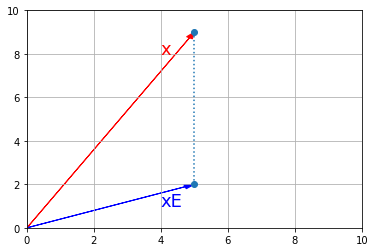

In [22]:
vecteur2D(x, [0,0],"x", color="r")
vecteur2D(xE, [0,0],"xE", color="b")
plt.plot([x[0], xE[0]], [x[1], xE[1]],"o:")
plt.axis([0, 10, 0, 10])
plt.grid()    
plt.show()

## Transformations géométriques et opérations matricielles en 3 dimensions

Dans cette partie nous allons étudier des transformations algébriques dans $\mathbb{R}^3$.

Définissez l'opération matricielle réalisant la translation d'un point $M = (x,y,z)$ par un vecteur $v_T = (x_T, y_T, z_T)$ et implantez cette opération par une fonction en langage python.

In [23]:
#On sait qu'il exitse deux type de façon d'eefectuer une translation, dans un repère cartésien, une translation est une addition 
#alors que dans un repère homogène,une translation est une multiplication, ou encore, 

#Pour effectuer une translation d'un point M donné en un point M',
#il suffirai donc soit de 

#1) multiplier chaque élément du point (matrice de translation) par un élément du vecteur du vecteur de trasnlation 
#dasn un repère homogène et, soit 

#2) d'additionner chaque élément de la matrice de translation avec un élément du vecteur de translation dans un répère cartésien

### Repère Homogène

def translation3DH(M,vT):
    
    x=M[0]*vT[0]
    y=M[1]*vT[1]
    z=M[2]*vT[2]
    
    return [x,y,z] #retour de la nouvelle position M'

In [24]:
M = [2,3,1]
vT= [3,5,4]
M_prime=translation3DH(M,vT)
print("M=",M," et, M'=",M_prime)

M= [2, 3, 1]  et, M'= [6, 15, 4]


In [25]:
def translation2D(vecteur,origine,**options):
    return plt.arrow(origine[0], origine[1], vecteur[0], vecteur[1], head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

In [43]:
#soit vT notre vecteur de translation et T notre matrice de translation
def translation3DC_plan(vT,T):
    
    u= np.array(vT)
    v= u
    w= u
    t1= np.array(T[0])
    t2= np.array(T[1])
    t3= np.array(T[2])    
    
    x_coords, y_coords = zip(t1, t2, t3, t1)
    plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

    translation2D(u, t1, color="r", linestyle=":")
    plt.text(4, 4.2, "u", color="r", fontsize=18)
    translation2D(v, t2, color="r", linestyle=":")
    plt.text(3, 2.3, "v", color="r", fontsize=18)
    translation2D(w, t3, color="r", linestyle=":")
    plt.text(3.5, 0.4, "w", color="r", fontsize=18)

    t1b = t1 + u
    t2b = t2 + v
    t3b = t3 + w

    x_coords_b, y_coords_b = zip(t1b, t2b, t3b, t1b)
    plt.plot(x_coords_b, y_coords_b, "b-", x_coords_b, y_coords_b, "bo")


    plt.axis([0, 6, 0, 5])
    plt.grid()
    plt.show()

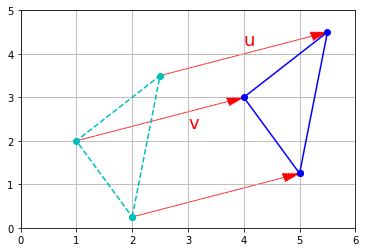

In [42]:
translation3DC_plan(([3,1]),([2,0.25],[2.5,3.5],[1,2]))

Définissez l'opération matricielle réalisant une homothétie de centre $(0,0,0)$ et de rapport $\alpha$ et implantez la via une fonction python.

In [48]:
### tenant compte de la définition de l'homothétie donnée par Wikipedia, retenons que :
# Une homothétie est une transformation géométrique par agrandissement ou réduction ; 
# autrement dit, une reproduction avec changement d'échelle. Elle se caractérise par son centre, 
#point invariant, et un rapport qui est un nombre réel.

def homothetie():
    t1=[2,0.25]
    t2=[2.5,3.5]
    t3=[1,2]
    a = 2.5
    O = [0,0]
    t1c = np.dot(a,t1)
    t2c = np.dot(a,t2)
    t3c = np.dot(a,t3)

    x_coords, y_coords = zip(t1, t2, t3, t1)
    plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

    translation2D(t1,O, color="r", linestyle=":")
    plt.text(4, 4.2, "u1", color="r", fontsize=18)
    translation2D(t2, O, color="r", linestyle=":")
    plt.text(3, 2.3, "v1", color="r", fontsize=18)
    translation2D(t3, O, color="r", linestyle=":")
    plt.text(3.5, 0.4, "w1", color="r", fontsize=18)

    x_coords_c, y_coords_c = zip(t1c, t2c, t3c, t1c)
    plt.plot(x_coords_c, y_coords_c, "b-", x_coords_c, y_coords_c, "bo")

    translation2D(np.dot(a,t1), O, color="b", linestyle=":")
    plt.text(2, 2.2, "u1", color="b", fontsize=18)
    translation2D(np.dot(a,t2), O, color="b", linestyle=":")
    plt.text(1, 2, "v1", color="b", fontsize=18)
    translation2D(np.dot(a,t3), O, color="b", linestyle=":")
    plt.text(0.5, 1, "w1", color="b", fontsize=18)


    plt.axis([0, 9, 0, 9])
    plt.grid()
    plt.show()

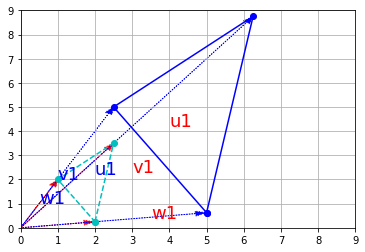

In [50]:
homothetie()

Une homothétie de rapport $\alpha$ et de centre $C=(x_c,y_c,z_c)$ peut être décomposée de la façon suivante.

Soit $v_c = ((x_c,y_c,z_c)$. On réalise dans un premier temps une translation de $-v_c$, puis une homothétie de rapport $\alpha$ et de centre $(0,0,0)$ et enfin un translation de $v_c$.

Exprimez de façon matricelle cette transformation géométrique et implantez-la via une fonction python, faisant éventuellement appel aux fonctions définies précédemment.

In [ ]:
def homothetie_C():
    return translation2D(homothetie(translation2D(m, (-1)*vc,color="r", linestyle=":"),a),vc,color="r", linestyle=":")

On définit la matrice de rotation $R_{\theta,v_R}$ d'un angle $\theta$ autour du vecteur unitaire $v_R = (x_R, y_R, z_R)$ de la façon suivante. 

$$ R_{\theta,v_R} = \left(\begin{array}{ccc}x_R^2.(1-\cos \theta) + \cos \theta & x_R y_R (1 - \cos \theta) - z_R \sin \theta & x_R z_R (1 - \cos \theta) + y_R \sin \theta \\ x_R y_R (1 - \cos \theta) + z_R \sin \theta & y_R^2.(1-\cos \theta) + \cos \theta & y_R z_R (1 - \cos \theta) - x_R \sin \theta \\ x_R z_R (1 - \cos \theta) - y_R \sin \theta & y_R z_R (1 - \cos \theta) + x_R \sin \theta & z_R^2.(1-\cos \theta) + \cos \theta \end{array}\right) $$

La transformation d'un point de $\mathbb{R}^3$ par une rotation de $\theta$ autour de $v_R$ revient à multiplier à gauche le vecteur représentant le point par $R_{\theta,v_R}$.

Attention, $v_R$ doit être unitaire. Si ce n'est pas le cas, il doit être multiplié par $\frac{1}{||v_R||}$. Par ailleurs, dans un système orienté normalement, les rotation s'opère dans le sens inverse des aiguilles d'une montre lorsque $v_R$ pointe vers l'observateur.

Implantez cette transformation sous la forme d'une fonction python.

In [55]:
def transformation (m , v , th):
    v =  v * (1/np.sqrt(sum([c2 for  c in v ])))
    return np.array([[v[0]  ** 2 (1 - np.cos(th)) + np.cos (th)  , 
                     v[0] * v[1] * (1 - np.cos(th)) - v[2] * np.sin(th) ,
                     v[0] * v[2]*( 1 - np.cos(th)) + v[1] * np.sin(th)
                    ],
                    [v[0] * v[1] (1 - np.cos(th)) +  v[2] * np.sin (th)  , 
                     v[1]**2  * (1 - np.cos(th)) + np.cos(th) ,
                     v[1] * v[2]* (1 - np.cos(th))  - v[0] * np.sin(th)
                    ],
                    [v[0]*v[2]* (1 - np.cos(th)) - v[1] * np.sin(th) ,
                     v[1] * v[2]* (1 - np.cos(th))  - v[0] * np.sin(th),
                     v[2]**2 *(1 - np.cos(th)) + np.cos (th) 
                     ]
                    ])@m

<>:3: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:3: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<ipython-input-55-a123a583847f>:3: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  return np.array([[v[0]  ** 2 (1 - np.cos(th)) + np.cos (th)  ,


Visualisez sur le plan $(\vec{x},\vec{y})$ en utilisant les fonctions précédentes :
- le cube de défini par les coins $\{(0,0,0), (1,0,0), (1,1,0), (0,1,0), (0,0,1), (1,0,1), (1,1,1), (0,1,1)\}$
- une translation du cube précédent de $(3,-2,4)$
- une homothétie du cube de rapport 3 et de centre (0,0,0)
- une homothétie du cube de rapport -2 et de centre (2,1,3)
- une rotation du cube de $\frac{\pi}{3}$ autour de l'axe défini par le vecteur $(5, 2, 3)$
- une combinaison de translation du cube précédent de $(3,-2,4)$, suivie d'une rotation du cube de $\frac{\pi}{3}$ autour de l'axe défini par le vecteur $(5, 2, 3)$ et enfin d'une une homothétie du cube de rapport -2 et de centre (2,1,3).

### Cube

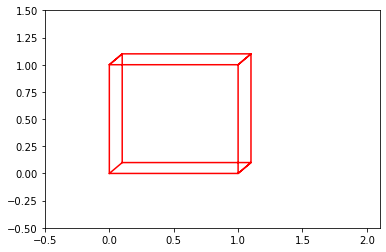

In [56]:
plt.plot([0, 0, 1, 1, 0, 0.1, 0.1, 0, 0.1, 1.1, 1.0, 1.1, 1.1, 1.0, 1.1, 0.1],
         [0, 1, 1, 0, 0, 0.1, 1.1, 1.0, 1.1, 1.1, 1.0, 1.1, 0.1, 0, 0.1, 0.1],
         "r-")
plt.axis([-0.5, 2.1, -0.5, 1.5])
plt.show()